In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.fft import fft

# Preprocessing

In [ ]:
##Read Exel dataset

In [2]:
import pandas as pd

# Replace 'your_excel_file.xlsx' 
excel_file_path = 'audio-n.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)
# Display the DataFrame
df.head()

,sounds,ml,diagnosis
0,vv55.wav,300,1
1,vv56.wav,290,1
2,vv57.wav,280,1
3,vv58.wav,270,1
4,vv59.wav,260,1


In [ ]:
##Read audio dataset

In [3]:
import os

# Specify the directory path
directory = 'audio-n'

# List all files in the directory
file_list = os.listdir(directory)

# Print the list of files
for filename in file_list:
    print(filename)

.ipynb_checkpoints
100..wav
100.wav
110..wav
110.wav
120..wav
120.wav
130..wav
130.wav
140..wav
140.wav
150..wav
150.wav
160..wav
160.wav
170..wav
170.wav
180..wav
180.wav
190..wav
190.wav
200..wav
200.wav
210..wav
210.wav
220..wav
220.wav
230..wav
230.wav
240..wav
240.wav
250..wav
250.wav
260..wav
260.wav
270..wav
270.wav
280..wav
280.wav
290..wav
290.wav
30..wav
30.wav
300..wav
300.wav
40..wav
40.wav
50..wav
50.wav
60..wav
60.wav
70..wav
70.wav
80..wav
80.wav
90..wav
90.wav
vv100.wav
vv101.wav
vv102.wav
vv103.wav
vv104.wav
vv105.wav
vv106.wav
vv107.wav
vv108.wav
vv109.wav
vv110.wav
vv111.wav
vv112.wav
vv55.wav
vv56.wav
vv57.wav
vv58.wav
vv59.wav
vv60.wav
vv61.wav
vv62.wav
vv63.wav
vv64.wav
vv65.wav
vv66.wav
vv67.wav
vv68.wav
vv69.wav
vv70.wav
vv71.wav
vv72.wav
vv73.wav
vv74.wav
vv75.wav
vv76.wav
vv77.wav
vv78.wav
vv79.wav
vv80.wav
vv81.wav
vv82.wav
vv83.wav
vv84.wav
vv85.wav
vv86.wav
vv87.wav
vv88.wav
vv89.wav
vv90.wav
vv91.wav
vv92.wav
vv93.wav
vv94.wav
vv95.wav
vv96.wav
vv97.wav
vv

# plot the envelope of one of the audio with 100ml

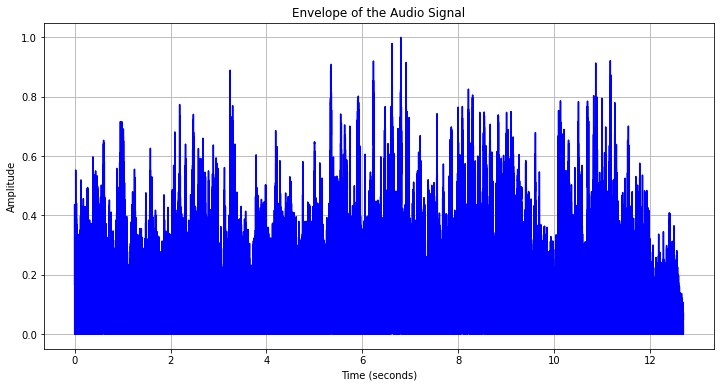

In [5]:
# Re-run the code to plot the envelope considering the sample rate

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Load the audio file
file_path = 'audio-n/100.wav'
rate, data = wav.read(file_path)

# Define the sample rate
sample_rate = 96000

# Normalize the audio data
normalized_data = data / np.max(np.abs(data))

# Create a time axis based on the sample rate
time_axis = np.linspace(0, len(data) / sample_rate, num=len(data))

# Create the envelope
envelope = np.abs(normalized_data)

# Plot the envelope with the time axis
plt.figure(figsize=(12, 6))
plt.plot(time_axis, envelope, color='blue')
plt.title('Envelope of the Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
##Extraction Labels

In [4]:
import pandas as pd

# Replace 'your_excel_file.xlsx' 
excel_file_path = 'audio-n.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)
# Extract the 'Diagnosis' column
y = df['diagnosis']

# Print or use the 'Diagnosis' column as needed
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
109    1
110    1
111    1
112    1
113    1
Name: diagnosis, Length: 114, dtype: int64


In [5]:
import pandas as pd

# Replace 'audio-n.xlsx' with your actual Excel file path
excel_file_path = 'audio-n.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Extract the 'Diagnosis' column
y = df['diagnosis']

# Count the occurrences of each value in the 'Diagnosis' column
diagnosis_counts = y.value_counts()

# Print the counts
print(diagnosis_counts)


1    64
0    50
Name: diagnosis, dtype: int64


In [ ]:
## Extraction charecterastic from audio files

In [18]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Specify the directory
directory = 'audio-n'

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    # (1) Log-space array from fmin to fmax, to get nbins values
    fmin =0 # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    # (2) Map the previous values to the freq. values obtained from the fft
    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    # (3) Get index of the f_values
    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    # (4) Get in the values of the fft in those indices. Sum values within each bin
    return fft_vector_bin, fv

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        # Construct the full file path
        audio_file_path = os.path.join(directory, audio_file)

        # Load the audio file
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)

        # Choose the number of FFT points
        n_fft = 2048

        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))

        # Choose the number of bins
        nbins =1000

        # Now you can use these values in your feature extraction function
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)

        # Append features to the list
        X.append(fft_feats)

        # Print the FFT features
        #print("File:", audio_file_path)
        #print("FFT Features:", fft_feats)
        #print("=" * 30)

# Convert the list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Now X_normalized contains your normalized feature values
print("X_normalized Shape:", X_normalized.shape)


X_normalized Shape: (114, 999)


In [ ]:
## Split data

In [20]:
from sklearn.model_selection import train_test_split

# Assuming X contains our FFT features and y contains labels
# X should be a 2D array where each row is theFFT features for one audio file
# y should be a 1D array containing the corresponding labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (91, 999)
y_train shape: (91,)
X_test shape: (23, 999)
y_test shape: (23,)


# prediction with SVM

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train contains our training features and y_train contains training labels

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.7802197802197802
Test Accuracy: 0.7391304347826086


In [ ]:
#Evaluation

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8125
Recall: 0.8125
F1 Score: 0.8125


# #Random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are defined from the previous code

# Build and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=96000)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)





Test Accuracy: 0.8695652173913043


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train are defined from the previous code

# Build and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=96000)
rf_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.967032967032967


# XG BOOST

In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as your dataset and target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=5, random_state=96000)
xgb_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9340659340659341
Testing Accuracy: 0.8260869565217391


# now I consider fmin = 8 with fft  extraction 

In [52]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Specify the directory
directory = 'audio-n'

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    # (1) Log-space array from fmin to fmax, to get nbins values
    fmin =8 # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    # (2) Map the previous values to the freq. values obtained from the fft
    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    # (3) Get index of the f_values
    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    # (4) Get in the values of the fft in those indices. Sum values within each bin
    return fft_vector_bin, fv

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        # Construct the full file path
        audio_file_path = os.path.join(directory, audio_file)

        # Load the audio file
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)

        # Choose the number of FFT points
        n_fft = 2048

        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))

        # Choose the number of bins
        nbins = 1000

        # Now you can use these values in your feature extraction function
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)

        # Append features to the list
        X.append(fft_feats)

        # Print the FFT features
        #print("File:", audio_file_path)
        #print("FFT Features:", fft_feats)
        #print("=" * 30)

# Convert the list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Now X_normalized contains your normalized feature values
print("X_normalized Shape:", X_normalized.shape)


X_normalized Shape: (114, 999)


In [22]:
from sklearn.model_selection import train_test_split

# Assuming X contains our FFT features and y contains labels
# X should be a 2D array where each row is theFFT features for one audio file
# y should be a 1D array containing the corresponding labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (91, 999)
y_train shape: (91,)
X_test shape: (23, 999)
y_test shape: (23,)


In [ ]:
#SVM with fmin =8

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train contains our training features and y_train contains training labels

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.7802197802197802
Test Accuracy: 0.7391304347826086


In [ ]:
#Random forest with fmin =8

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are defined from the previous code

# Build and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=96000)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.8695652173913043
Train Accuracy: 0.7802197802197802


In [ ]:
#ROC

In [ ]:
#XGBOOST with fmin =8

In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as your dataset and target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Build and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=3, random_state=96000)
xgb_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9560439560439561
Testing Accuracy: 0.8260869565217391


In [ ]:
#extration fft feature with fmin =16

In [26]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Specify the directory
directory = 'audio-n'

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    # (1) Log-space array from fmin to fmax, to get nbins values
    fmin =16 # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    # (2) Map the previous values to the freq. values obtained from the fft
    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    # (3) Get index of the f_values
    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    # (4) Get in the values of the fft in those indices. Sum values within each bin
    return fft_vector_bin, fv

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        # Construct the full file path
        audio_file_path = os.path.join(directory, audio_file)

        # Load the audio file
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)

        # Choose the number of FFT points
        n_fft = 2048

        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))

        # Choose the number of bins
        nbins = 1000

        # Now you can use these values in your feature extraction function
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)

        # Append features to the list
        X.append(fft_feats)

        # Print the FFT features
        #print("File:", audio_file_path)
        #print("FFT Features:", fft_feats)
        #print("=" * 30)

# Convert the list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Now X_normalized contains your normalized feature values
print("X_normalized Shape:", X_normalized.shape)


X_normalized Shape: (114, 999)


In [ ]:
#split data

In [27]:
from sklearn.model_selection import train_test_split

# Assuming X contains our FFT features and y contains labels
# X should be a 2D array where each row is theFFT features for one audio file
# y should be a 1D array containing the corresponding labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (91, 999)
y_train shape: (91,)
X_test shape: (23, 999)
y_test shape: (23,)


In [ ]:
#SVM

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train contains our training features and y_train contains training labels

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.7802197802197802
Test Accuracy: 0.7391304347826086


In [ ]:
#RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are defined from the previous code

# Build and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3, random_state=96000)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)

Test Accuracy: 0.8695652173913043
Train Accuracy: 0.7802197802197802


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 0.8125
F1 Score: 0.896551724137931


C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


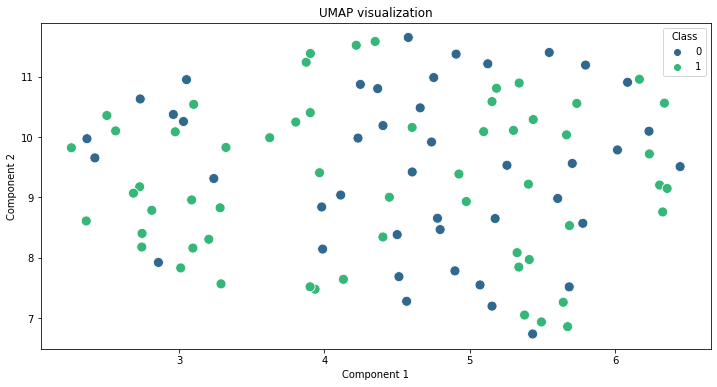

In [224]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# Example data
# Assuming 'features' is your feature matrix and 'labels' is your label vector
features = np.random.rand(100, 10)  # Replace with your actual feature matrix
labels = np.random.randint(0, 2, size=100)  # Replace with your actual labels

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# UMAP with parameter tuning
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
embedding = umap_model.fit_transform(features_scaled)

# Plot the UMAP results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='viridis', s=100)
plt.title('UMAP visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Class')
plt.show()


In [ ]:
#XGBOOST (FMIN =16)

In [137]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as your dataset and target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Build and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=3, random_state=96000)
xgb_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9560439560439561
Testing Accuracy: 0.8260869565217391


Training Accuracy: 0.875
Testing Accuracy: 0.7


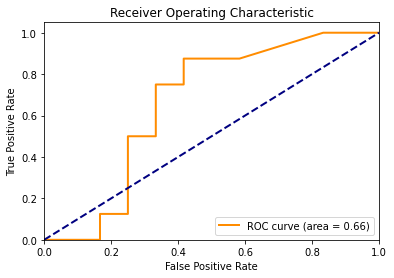

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming X and y are defined as your dataset and target variable
# Example data for illustration
X = np.random.rand(100, 10)  # Replace with your actual feature matrix
y = np.random.randint(0, 2, size=100)  # Replace with your actual labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Build and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=3, random_state=96000, use_label_encoder=False)
xgb_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Get predicted probabilities for the test set
y_test_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# AUTO ML extract feauture fft with fmin =8

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7973204959814868

Generation 2 - Current best internal CV score: 0.7973204959814868

Generation 3 - Current best internal CV score: 0.7973204959814868

Generation 4 - Current best internal CV score: 0.7980798699064953

Generation 5 - Current best internal CV score: 0.7997123937294216

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=6)
                         Metric      Value
0            F1 Score Train (%)  92.313268
1             F1 Score Test (%)  83.298827
2       Standard Deviation Test   0.499527
3  False Positive Rate Test (%)   0.000000
4  False Negative Rate Test (%)  25.000000


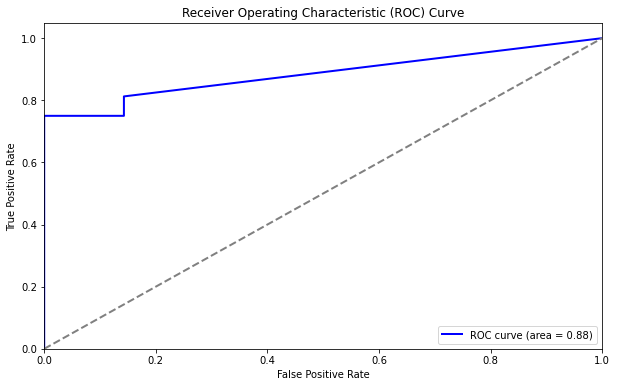

In [32]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import pandas as pd
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin =8  # Set fmin to 8 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Load the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']

# Specify the directory
directory ='audio-n'

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)
        n_fft = 2048
        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft, dtype=np.complex128))
        nbins = 1000
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
        X.append(fft_feats)

X = np.array(X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=96000)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=96000, scoring='f1_weighted')

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Predict on the training set
y_train_pred = tpot.predict(X_train)

# Predict on the test set
y_test_pred = tpot.predict(X_test)

# Evaluate the model
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix_test.ravel()
fpr_test = fp / (fp + tn)
fnr_test = fn / (fn + tp)

std_dev_test = np.std(y_test_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    "Metric": ["F1 Score Train (%)", "F1 Score Test (%)", "Standard Deviation Test", "False Positive Rate Test (%)", "False Negative Rate Test (%)"],
    "Value": [f1_train * 100, f1_test * 100, std_dev_test, fpr_test * 100, fnr_test * 100]
})

# Export the best pipeline
tpot.export('best_pipeline.py')

# Display the DataFrame
print(metrics_df)

# Get the predicted probabilities for the positive class
y_test_prob = tpot.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8295500895733093

Generation 2 - Current best internal CV score: 0.8440366848493783

Generation 3 - Current best internal CV score: 0.8440366848493783

Generation 4 - Current best internal CV score: 0.8440366848493783

Generation 5 - Current best internal CV score: 0.8440366848493783

Best pipeline: DecisionTreeClassifier(BernoulliNB(BernoulliNB(input_matrix, alpha=0.01, fit_prior=True), alpha=100.0, fit_prior=True), criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=6)
                         Metric      Value
0            F1 Score Train (%)  96.704892
1             F1 Score Test (%)  83.298827
2       Standard Deviation Test   0.499527
3  False Positive Rate Test (%)   0.000000
4  False Negative Rate Test (%)  25.000000


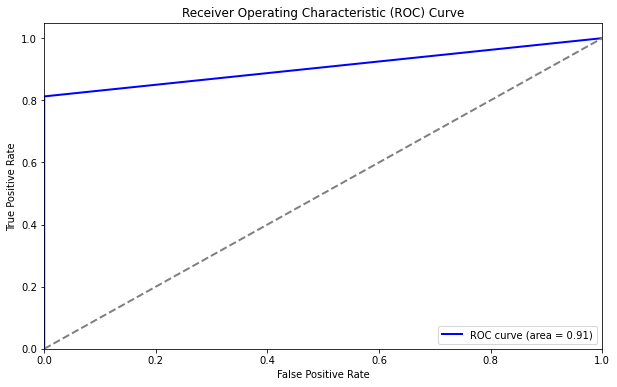

In [79]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import pandas as pd
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin = 0  # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Load the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']

# Specify the directory
directory ='audio-n'

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)
        n_fft = 2048
        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft, dtype=np.complex128))
        nbins = 1000
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
        X.append(fft_feats)

X = np.array(X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=96000)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=96000, scoring='f1_weighted')

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Predict on the training set
y_train_pred = tpot.predict(X_train)

# Predict on the test set
y_test_pred = tpot.predict(X_test)

# Evaluate the model
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix_test.ravel()
fpr_test = fp / (fp + tn)
fnr_test = fn / (fn + tp)

std_dev_test = np.std(y_test_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    "Metric": ["F1 Score Train (%)", "F1 Score Test (%)", "Standard Deviation Test", "False Positive Rate Test (%)", "False Negative Rate Test (%)"],
    "Value": [f1_train * 100, f1_test * 100, std_dev_test, fpr_test * 100, fnr_test * 100]
})

# Export the best pipeline
tpot.export('best_pipeline.py')

# Display the DataFrame
print(metrics_df)

# Get the predicted probabilities for the positive class
y_test_prob = tpot.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.809513366750209

Generation 2 - Current best internal CV score: 0.8107237791448318

Generation 3 - Current best internal CV score: 0.8107237791448318

Generation 4 - Current best internal CV score: 0.8209419381787804

Generation 5 - Current best internal CV score: 0.8301771474139894

Best pipeline: DecisionTreeClassifier(BernoulliNB(input_matrix, alpha=1.0, fit_prior=False), criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=2)
                         Metric      Value
0            F1 Score Train (%)  92.313268
1             F1 Score Test (%)  83.298827
2       Standard Deviation Test   0.499527
3  False Positive Rate Test (%)   0.000000
4  False Negative Rate Test (%)  25.000000


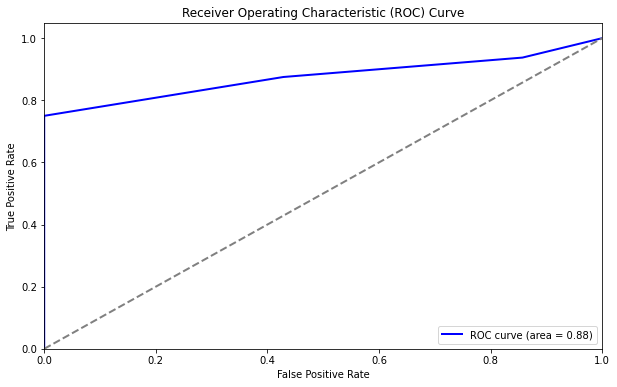

                         Metric      Value
0             F1 Score Test (%)  83.298827
1  False Positive Rate Test (%)   0.000000
2  False Negative Rate Test (%)  25.000000


In [55]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import pandas as pd
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin = 0  # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Load the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']

# Specify the directory
directory = 'audio-n'

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)
        n_fft = 2048
        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft, dtype=np.complex128))
        nbins = 1000
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
        X.append(fft_feats)

X = np.array(X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=96000)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=96000, scoring='f1_weighted')

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Predict on the training set
y_train_pred = tpot.predict(X_train)

# Predict on the test set
y_test_pred = tpot.predict(X_test)

# Evaluate the model
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix_test.ravel()
fpr_test = fp / (fp + tn)
fnr_test = fn / (fn + tp)

std_dev_test = np.std(y_test_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    "Metric": ["F1 Score Train (%)", "F1 Score Test (%)", "Standard Deviation Test", "False Positive Rate Test (%)", "False Negative Rate Test (%)"],
    "Value": [f1_train * 100, f1_test * 100, std_dev_test, fpr_test * 100, fnr_test * 100]
})

# Export the best pipeline
tpot.export('best_pipeline.py')

# Display the DataFrame
print(metrics_df)

# Get the predicted probabilities for the positive class
y_test_prob = tpot.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Adjusting the decision threshold
threshold = 0.4  # Experiment with different thresholds
y_test_pred_threshold = (tpot.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Recalculate metrics with the adjusted threshold
f1_test_threshold = f1_score(y_test, y_test_pred_threshold, average='weighted')
conf_matrix_test_threshold = confusion_matrix(y_test, y_test_pred_threshold)
tn, fp, fn, tp = conf_matrix_test_threshold.ravel()
fpr_test_threshold = fp / (fp + tn)
fnr_test_threshold = fn / (fn + tp)

# Display adjusted metrics
adjusted_metrics_df = pd.DataFrame({
    "Metric": ["F1 Score Test (%)", "False Positive Rate Test (%)", "False Negative Rate Test (%)"],
    "Value": [f1_test_threshold * 100, fpr_test_threshold * 100, fnr_test_threshold * 100]
})
print(adjusted_metrics_df)


C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


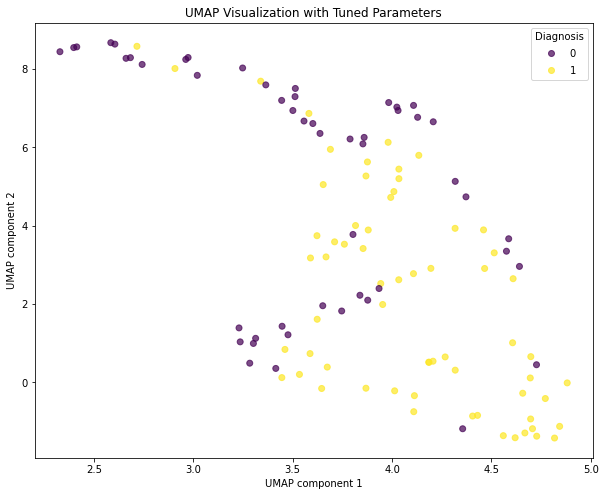

In [251]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin = 0  # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[-1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[f_vector > val]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[-1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Load the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']  # Binary classification: 0 and 1

# Specify the directory containing audio files
directory = 'audio-n'

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        try:
            audio_signal, sr = librosa.load(audio_file_path, sr=96000)
            n_fft = 2048
            f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))
            nbins = 1000
            fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
            X.append(fft_feats)
        except Exception as e:
            print(f"Error processing {audio_file}: {e}")

# Convert the list to a NumPy array
X = np.array(X)

# Check if X is not empty
if X.size > 0:
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Applying UMAP for visualization with tuned parameters
    reducer = umap.UMAP(n_neighbors=50, min_dist=0.05, random_state=96000)
    X_umap = reducer.fit_transform(X_normalized)

    # Plotting the UMAP results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Diagnosis")
    plt.xlabel('UMAP component 1')
    plt.ylabel('UMAP component 2')
    plt.title('UMAP Visualization with Tuned Parameters')
    plt.show()
else:
    print("No audio features were extracted. Please check your audio files and the extraction process.")


C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


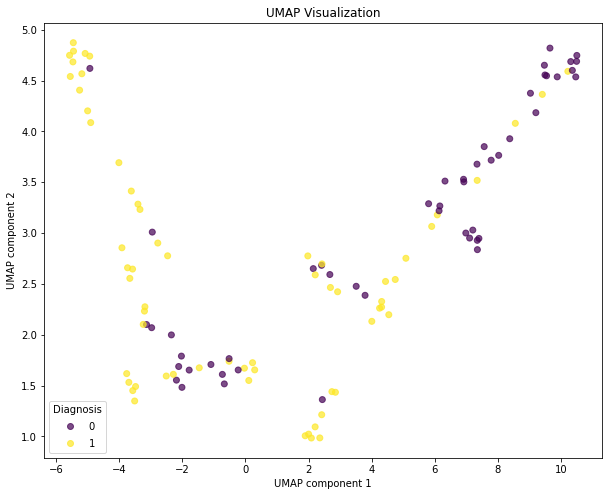

In [3]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=96000)
X_umap = reducer.fit_transform(X_normalized)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Diagnosis")
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.title('UMAP Visualization')
plt.show()


C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jo

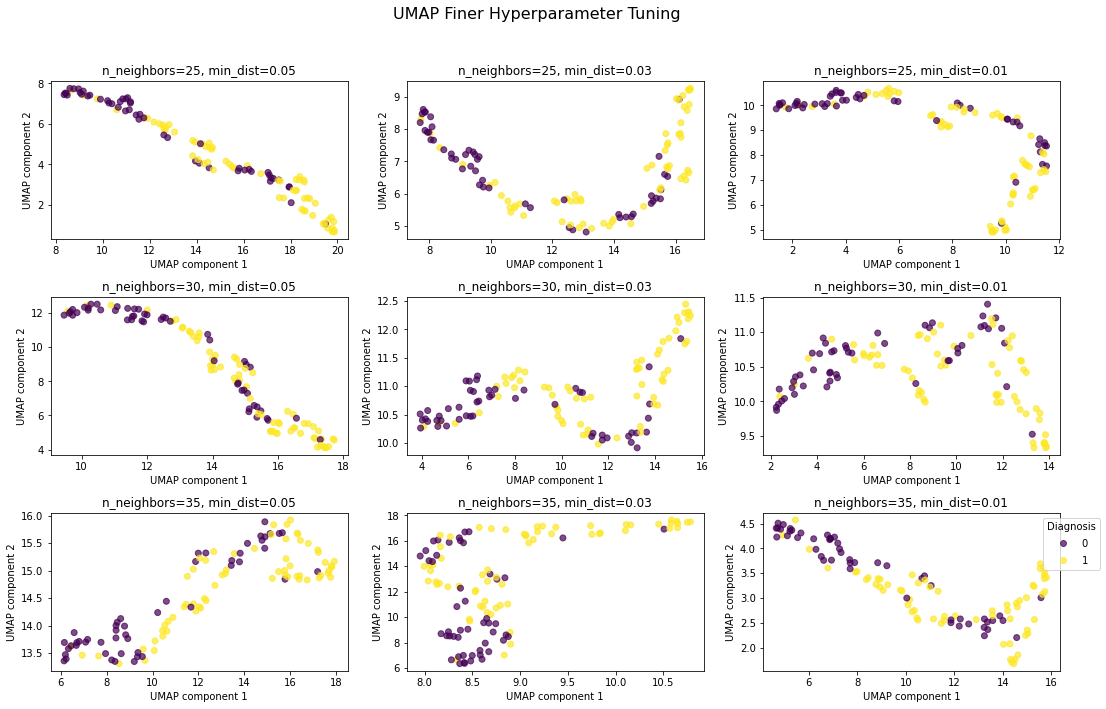

In [14]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin = 0  # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[len(f_vector) - 1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[((f_vector > val))]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[len(f_vector) - 1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Load the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']

# Specify the directory
directory = 'audio-n'

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        audio_signal, sr = librosa.load(audio_file_path, sr=96000)
        n_fft = 2048
        f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft, dtype=np.complex128))
        nbins = 1000
        fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
        X.append(fft_feats)

X = np.array(X)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Finer hyperparameter tuning for UMAP
n_neighbors_options = [25, 30, 35]
min_dist_options = [0.05, 0.03, 0.01]

# Plotting UMAP results with different hyperparameters
fig, axs = plt.subplots(len(n_neighbors_options), len(min_dist_options), figsize=(15, 10))
fig.suptitle('UMAP Finer Hyperparameter Tuning', fontsize=16)

for i, n_neighbors in enumerate(n_neighbors_options):
    for j, min_dist in enumerate(min_dist_options):
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=96000)
        X_umap = reducer.fit_transform(X_normalized)
        
        ax = axs[i, j]
        scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
        ax.set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')
        ax.set_xlabel('UMAP component 1')
        ax.set_ylabel('UMAP component 2')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend(*scatter.legend_elements(), title="Diagnosis", loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


C:\Users\moham\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


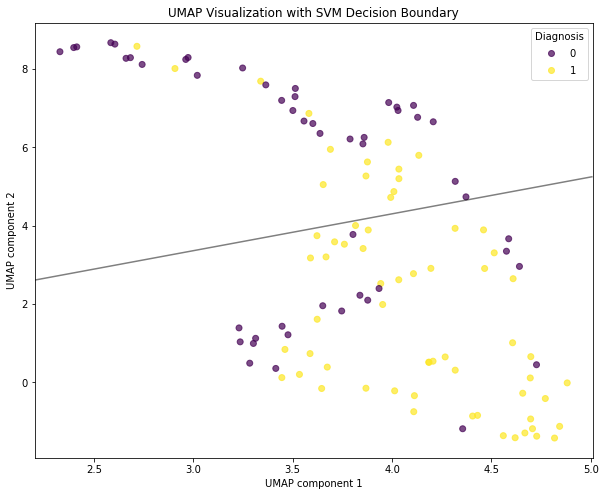

In [45]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import umap

# Define the FFT feature extraction function
def features_extractor_fft_lin_bin(f_vector, fft_us, nbins):
    fmin = 0  # Set fmin to 0 kHz
    fv = np.linspace(fmin, f_vector[-1], num=nbins)

    f_vector_bin = []
    for val in fv:
        nf = f_vector[f_vector > val]
        if nf.size > 0:
            valf = nf[0]
            f_vector_bin.append(valf)
    f_vector_bin.append(f_vector[-1])

    fft_vector_bin = []
    for index in range(len(f_vector_bin) - 1):
        ii = np.where((f_vector >= f_vector_bin[index]) & (f_vector < f_vector_bin[index + 1]))
        fft_values = fft_us[ii]
        feat = np.sum(fft_values)
        fft_vector_bin.append(feat)

    return fft_vector_bin, fv

# Load the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']  # Binary classification: 0 and 1

# Specify the directory containing audio files
directory = 'audio-n'

# Lists to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        try:
            audio_signal, sr = librosa.load(audio_file_path, sr=96000)
            n_fft = 2048
            f_vector, fft_us = librosa.fft_frequencies(sr=sr, n_fft=n_fft), np.abs(librosa.stft(audio_signal, n_fft=n_fft))
            nbins = 1000
            fft_feats, freq_bins = features_extractor_fft_lin_bin(f_vector, fft_us, nbins)
            X.append(fft_feats)
        except Exception as e:
            print(f"Error processing {audio_file}: {e}")

# Convert the list to a NumPy array
X = np.array(X)

# Check if X is not empty
if X.size > 0:
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Applying UMAP for visualization with tuned parameters
    reducer = umap.UMAP(n_neighbors=50, min_dist=0.05, random_state=96000)
    X_umap = reducer.fit_transform(X_normalized)

    # Train an SVM classifier on the UMAP-transformed features
    svm = SVC(kernel='linear', random_state=96000)
    svm.fit(X_umap, y)

    # Plotting the UMAP results with SVM decision boundary
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Diagnosis")
    plt.xlabel('UMAP component 1')
    plt.ylabel('UMAP component 2')
    plt.title('UMAP Visualization with SVM Decision Boundary')

    # Plot SVM decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
    
    plt.show()
else:
    print("No audio features were extracted. Please check your audio files and the extraction process.")


# prediction wit MFCC extraction 

In [163]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to calculate MFCC features from an audio file with fmin parameter
def feature_extraction(file_path, fmin=16):
    try:
        x, sample_rate = librosa.load(file_path, sr=96000)
        mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=35, fmin=fmin).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error processing audio file {file_path}: {e}")
        return None

# Directory containing audio files
directory = 'audio-n'

# Dictionary to store features
features = {}

# Iterate through audio files in the directory
for audio in os.listdir(directory):
    if audio.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio)
        # Calculate MFCC features with fmin parameter
        mfcc = feature_extraction(audio_file_path, fmin=0)  # Change fmin value as needed (e.g., 0, 8, 16)
        if mfcc is not None:
            # Store features in the dictionary
            features[audio_file_path] = mfcc
        else:
            print(f"No valid MFCC features extracted for {audio}")

# Convert the dictionary of MFCC features to a numpy array
X = np.array(list(features.values()))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Print the dictionary of features
for i, (file_path, mfcc) in enumerate(features.items()):
    print(f"Audio file {i + 1}: {file_path}")
    print(f"Original MFCC features: {mfcc}")
    print(f"Normalized MFCC features: {X_normalized[i]}")


Audio file 1: audio-n\100..wav
Original MFCC features: [-4.7689487e+02  1.3698215e+02 -2.0677488e+00  2.7650484e+01
 -2.6565945e+01  2.5215673e+00 -2.2768337e+01 -1.9937716e+01
 -1.8215815e+01 -2.9202581e+01 -4.2083712e+00 -1.1260689e+01
 -1.1536780e-01  2.1176915e+00  2.4714589e+00  1.2748725e+01
  9.6145182e+00  8.4998636e+00  6.0622430e+00  5.7089715e+00
  6.8585625e+00  2.8840842e+00 -4.5449236e-01  1.6238711e+00
  1.1549146e+00 -3.8533089e+00 -6.3855453e+00 -4.9599600e+00
 -2.0377254e+00 -2.4718268e+00 -1.5747042e+00 -1.4046233e+00
  2.8608384e+00  5.5539722e+00  3.9403188e+00]
Normalized MFCC features: [-0.7552066  -1.8824277   1.5705302  -0.12225932  0.7165586  -2.0893009
  0.61070305 -1.5872948  -0.41464102 -0.69112355 -0.12323801 -0.06050784
  0.04713928  0.4718589   0.8449151   1.6104124   1.5445668   1.961384
  0.9700597   1.2046243   0.01126232 -0.47605747 -1.6379222  -0.55482477
 -0.6084337  -0.39115202 -0.46395484 -0.66864836 -1.0915917  -0.72806424
 -1.01686    -0.347309

In [164]:
import pandas as pd

# Replace 'your_excel_file.xlsx' 
excel_file_path = 'audio-n.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)
# Extract the 'Diagnosis' column
y = df['diagnosis']

# Print or use the 'Diagnosis' column as needed
print(diagnosis_counts)

1    64
0    50
Name: diagnosis, dtype: int64


In [ ]:
#split data

In [165]:
from sklearn.model_selection import train_test_split

# Assuming X contains our FFT features and y contains labels
# X should be a 2D array where each row is theFFT features for one audio file
# y should be a 1D array containing the corresponding labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (91, 35)
y_train shape: (91,)
X_test shape: (23, 35)
y_test shape: (23,)


In [ ]:
#SVM

In [166]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train contains our training features and y_train contains training labels

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.5384615384615384
Test Accuracy: 0.391304347826087


In [ ]:
##Random forest

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train are defined from the previous code

# Build and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3,random_state=96000)
rf_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.8791208791208791


In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are defined from the previous code

# Build and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=3,random_state=96000)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.6086956521739131


In [ ]:
#Xgboost

In [170]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are defined as your dataset and target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Build and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=5, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.978021978021978
Testing Accuracy: 0.5652173913043478


In [171]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to calculate MFCC features from an audio file with fmin parameter
def feature_extraction(file_path, fmin=16):
    try:
        x, sample_rate = librosa.load(file_path, sr=96000)
        mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=35, fmin=fmin).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error processing audio file {file_path}: {e}")
        return None

# Directory containing audio files
directory = 'audio-n'

# Dictionary to store features
features = {}

# Iterate through audio files in the directory
for audio in os.listdir(directory):
    if audio.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio)
        # Calculate MFCC features with fmin parameter
        mfcc = feature_extraction(audio_file_path, fmin=8)  # fmin value set to 8
        if mfcc is not None:
            # Store features in the dictionary
            features[audio_file_path] = mfcc
        else:
            print(f"No valid MFCC features extracted for {audio}")

# Convert the dictionary of MFCC features to a numpy array
X = np.array(list(features.values()))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Print the dictionary of features
for i, (file_path, mfcc) in enumerate(features.items()):
    print(f"Audio file {i + 1}: {file_path}")
    print(f"Original MFCC features: {mfcc}")
    print(f"Normalized MFCC features: {X_normalized[i]}")


Audio file 1: audio-n\100..wav
Original MFCC features: [-4.7604047e+02  1.3548045e+02 -2.7758774e-01  2.6984701e+01
 -2.4838947e+01  2.2817035e+00 -2.1635794e+01 -2.0278078e+01
 -1.8292700e+01 -2.9936964e+01 -5.2118859e+00 -1.1809149e+01
 -1.1586686e+00  1.7217833e+00  1.5337152e+00  1.2339769e+01
  9.2913837e+00  8.5425348e+00  6.2387290e+00  5.9391761e+00
  7.4315491e+00  3.4853237e+00  8.4281281e-02  1.8990910e+00
  1.6896123e+00 -3.1847112e+00 -6.0112538e+00 -4.8550835e+00
 -2.2191510e+00 -2.6985519e+00 -2.2184489e+00 -2.3357041e+00
  1.6548373e+00  4.6814523e+00  3.4182920e+00]
Normalized MFCC features: [-0.69241667 -2.1097622   1.640567   -0.288353    0.8273275  -2.1991138
  0.6913146  -1.6080396  -0.4511514  -0.70021814 -0.22302836 -0.05732858
 -0.06047746  0.4783366   0.7791299   1.591086    1.5146884   1.9145812
  1.0811461   1.3066947   0.25397435 -0.36809304 -1.5282608  -0.588737
 -0.52305645 -0.35914475 -0.41515633 -0.63488245 -1.125793   -0.8096032
 -1.1771742  -0.46709275

In [172]:
from sklearn.model_selection import train_test_split

# Assuming X contains our FFT features and y contains labels
# X should be a 2D array where each row is theFFT features for one audio file
# y should be a 1D array containing the corresponding labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96000)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (91, 35)
y_train shape: (91,)
X_test shape: (23, 35)
y_test shape: (23,)


In [173]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train contains our training features and y_train contains training labels

# Create SVM classifier instance with regularization
svm_classifier = SVC(C=7, class_weight='balanced', random_state=96000)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict labels for the training set
y_train_pred = svm_classifier.predict(X_train)

# Compute the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
# Predict labels for the test set
y_test_pred = svm_classifier.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.5274725274725275
Test Accuracy: 0.391304347826087


In [ ]:
fmin =0 with MFCC

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7195457449327417

Generation 2 - Current best internal CV score: 0.7200429400893797

Generation 3 - Current best internal CV score: 0.7200429400893797

Generation 4 - Current best internal CV score: 0.7200429400893797

Generation 5 - Current best internal CV score: 0.7285200523590616

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=1, min_child_weight=4, n_estimators=100, n_jobs=1, subsample=0.6000000000000001, verbosity=0)
                         Metric      Value
0            F1 Score Train (%)  87.903291
1             F1 Score Test (%)  66.231884
2       Standard Deviation Test   0.488042
3  False Positive Rate Test (%)  42.857143
4  False Negative Rate Test (%)  31.250000


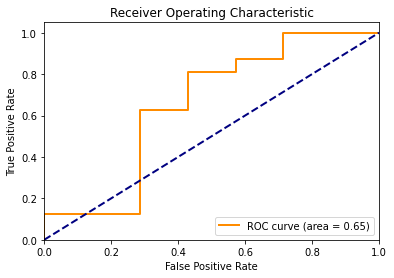

In [86]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score
import pandas as pd
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

# Function to calculate MFCC features from an audio file
def feature_extraction(file_path):
    try:
        x, sample_rate = librosa.load(file_path, sr=96000)
        mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=35).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error processing audio file {file_path}: {e}")
        return None

# Load the Excel file
excel_file_path = 'audio-n.xlsx'
df = pd.read_excel(excel_file_path)
y = df['diagnosis']

# Directory containing audio files
directory = 'audio-n'

# List to store features
X = []

# Iterate through audio files in the directory
for audio_file in os.listdir(directory):
    if audio_file.endswith('.wav'):
        audio_file_path = os.path.join(directory, audio_file)
        # Calculate MFCC features
        mfcc = feature_extraction(audio_file_path)
        if mfcc is not None:
            X.append(mfcc)
        else:
            print(f"No valid MFCC features extracted for {audio_file}")

# Convert list of features to a numpy array
X = np.array(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=96000)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=50, random_state=96000, scoring='f1_weighted')

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Predict on the training set
y_train_pred = tpot.predict(X_train)

# Predict on the test set
y_test_pred = tpot.predict(X_test)
y_test_pred_proba = tpot.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Evaluate the model
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix_test.ravel()
fpr_test = fp / (fp + tn)
fnr_test = fn / (fn + tp)

std_dev_test = np.std(y_test_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    "Metric": ["F1 Score Train (%)", "F1 Score Test (%)", "Standard Deviation Test", "False Positive Rate Test (%)", "False Negative Rate Test (%)"],
    "Value": [f1_train * 100, f1_test * 100, std_dev_test, fpr_test * 100, fnr_test * 100]
})

# Export the best pipeline
tpot.export('best_pipeline.py')

# Display the DataFrame
print(metrics_df)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
